## Polynomial Regression:
Sometimes we have data that does not merely follow a linear trend. We sometimes have data that follows a polynomial trend. Therefore, we are going to use polynomial regression.
Before digging into its implementation, we need to know how the graphs of some primary polynomial data look.
moreon: https://pub.towardsai.net/machine-learning-algorithms-for-beginners-with-python-code-examples-ml-19c6afd60daa

### Graph for Y=X:

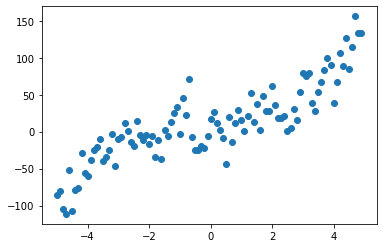

In [1]:
# Import required libraries:
import numpy as np
import matplotlib.pyplot as plt
# Generate datapoints:
x = np.arange(-5,5,0.1)  # (start, end, stepsize)
n = len(x)

# add some noise to our data:
# Here we are using normal distribution:

y_noise = 20 * np.random.normal(size = len(x))
y = 1*(x**3) + 1*(x**2) + 1*x + 3+y_noise
plt.scatter(x,y)

### Initialize x,x²,x³ vectors:
We are taking the maximum power of x as 3. So our X matrix will have X, X², X³.

In [2]:
# Make polynomial data:
x1 = x
x2 = np.power(x1,2)
x3 = np.power(x1,3)

In [3]:
# Reshaping data:
x1_new = np.reshape(x1,(n,1))
x2_new = np.reshape(x2,(n,1))
x3_new = np.reshape(x3,(n,1))

### Column-1 of X matrix:
The 1st column of the main matrix X will always be 1 because it holds the coefficient of beta_0.

In [4]:
# First column of matrix X:
x_bias = np.ones((n,1))

### Form the complete x matrix:
Look at the matrix X at the start of this implementation. We are going to create it by appending vectors.

In [5]:
# Form the complete x matrix:
x_new = np.append(x_bias,x1_new,axis=1)
x_new = np.append(x_new,x2_new,axis=1)
x_new = np.append(x_new,x3_new,axis=1)

### Transpose of the matrix:
We are going to calculate the value of theta step-by-step. First, we need to find the transpose of the matrix.

In [6]:
# Finding transpose:
x_new_transpose = np.transpose(x_new)

### Matrix multiplication:
After finding the transpose, we need to multiply it with the original matrix. Keep in mind that we are going to implement it with a normal equation, so we have to follow its rules.

In [7]:
# Finding dot product of original and transposed matrix :
x_new_transpose_dot_x_new = x_new_transpose.dot(x_new)

### The inverse of a matrix:
Finding the inverse of the matrix and storing it in temp1.

In [8]:
# Finding Inverse:
temp_1 = np.linalg.inv(x_new_transpose_dot_x_new)# Finding the dot product of transposed x and y :

### Matrix multiplication:
Finding the multiplication of transposed X and the Y vector and storing it in the temp2 variable.

In [9]:
temp_2 = x_new_transpose.dot(y)

### Coefficient values:
To find the coefficient values, we need to multiply temp1 and temp2. See the Normal Equation formula.

In [10]:
# Finding coefficients:
theta = temp_1.dot(temp_2)
theta

array([7.58268919, 2.55910116, 0.63476432, 0.8805793 ])

### Store the coefficients in variables:
Storing those coefficient values in different variables.

In [11]:
# Store coefficient values in different variables:
beta_0 = theta[0]
beta_1 = theta[1]
beta_2 = theta[2]
beta_3 = theta[3]

### Plot the data with curve:
Plotting the data with the regression curve.

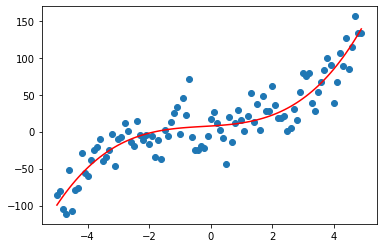

In [12]:
# Plot the polynomial curve:
plt.scatter(x,y)
plt.plot(x,beta_0 + beta_1*x1 + beta_2*x2 + beta_3*x3,c="red")
# Prediction function:

### Prediction function:
Now we are going to predict the output using the regression curve.

In [13]:
def prediction(x1,x2,x3,beta_0,beta_1,beta_2,beta_3):
    y_pred = beta_0 + beta_1*x1 + beta_2*x2 + beta_3*x3
    return y_pred
 
# Making predictions:
pred = prediction(x1,x2,x3,beta_0,beta_1,beta_2,beta_3)

### Error function:
Calculate the error using mean squared error function.

In [14]:
# Calculate accuracy of model:
def err(y_pred,y):
    var = (y - y_pred)
    var = var*var
    n = len(var)
    MSE = var.sum()
    MSE = MSE/n
 
    return MSE
# Calculating the error:
error = err(pred,y)
error

456.00116664347115